In [1]:
# multi linear reg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv("50_startups.csv")

In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df2=df.rename({"R&D Spend":"RDspend"},axis=1)

In [6]:
df3=df2.rename({"Marketing Spend":"Marketing_Spend"},axis=1)

In [7]:
#Correlation Matrix

df3.corr()

RDspend  Administration  Marketing_Spend    Profit
RDspend          1.000000        0.241955         0.724248  0.972900
Administration   0.241955        1.000000        -0.032154  0.200717
Marketing_Spend  0.724248       -0.032154         1.000000  0.747766
Profit           0.972900        0.200717         0.747766  1.000000

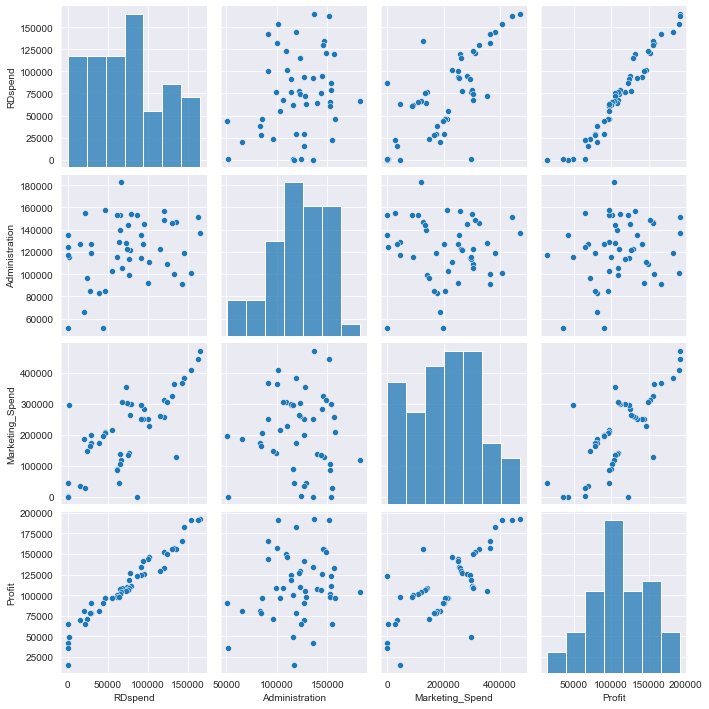

In [8]:
sns.set_style(style="darkgrid")
sns.pairplot(df3)

In [9]:
import statsmodels.formula.api as smf

In [ ]:
#Preparing a model

In [10]:
model=smf.ols("Profit~RDspend+Administration+Marketing_Spend",data=df3).fit()

In [11]:
model.params

Intercept          50122.192990
RDspend                0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:
print(model.tvalues,"\n",model.pvalues)

Intercept           7.626218
RDspend            17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RDspend            2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [13]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [14]:
 
mp_a=smf.ols("Profit~Administration",data=df3).fit()

In [15]:
print(mp_a.tvalues,"\n",mp_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [16]:
mp_ma=smf.ols("Profit~Marketing_Spend",data=df3).fit()

In [17]:
print(mp_ma.tvalues,"\n",mp_ma.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [18]:
mp_ad=smf.ols("Profit~Administration+Marketing_Spend",data=df3).fit()

In [19]:
print(mp_ad.tvalues,"\n",mp_ad.pvalues)

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [20]:
#Calculating VIF¶
rsq_rd = smf.ols('RDspend~Administration+Marketing_Spend',data=df3).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

In [21]:
rsq_ad=smf.ols('Administration~RDspend+Marketing_Spend',data=df3).fit().rsquared
vif_ad=1/(1-rsq_ad)

In [22]:
rsq_mk=smf.ols('Marketing_Spend~Administration+Marketing_Spend',data=df3).fit().rsquared
vif_mk=1/(1-rsq_mk)

<ipython-input-22-9751119fdccb>:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_mk=1/(1-rsq_mk)


In [23]:
vif_mk

inf

In [24]:
d1= {'variables':['RDspend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_mk]}
vif_frame=pd.DataFrame(d1)

In [25]:
vif_frame

variables       VIF
0          RDspend  2.468903
1   Administration  1.175091
2  Marketing_Spend       inf

In [ ]:
#Test for Normality of Residuals (Q-Q Plot)

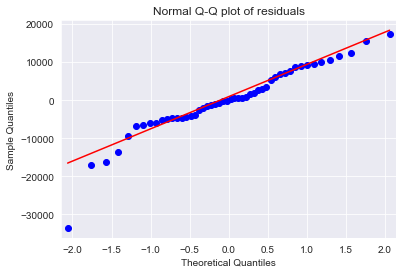

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [ ]:
#Residual Plot for Homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

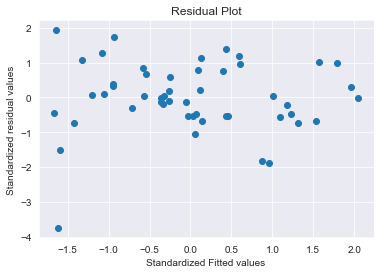

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Residual Vs Regressors

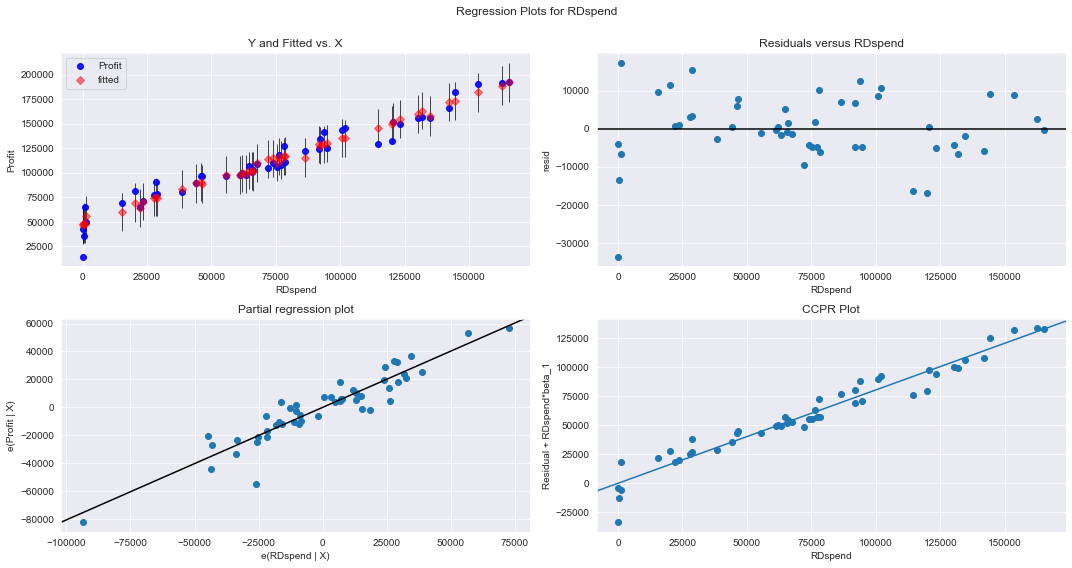

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

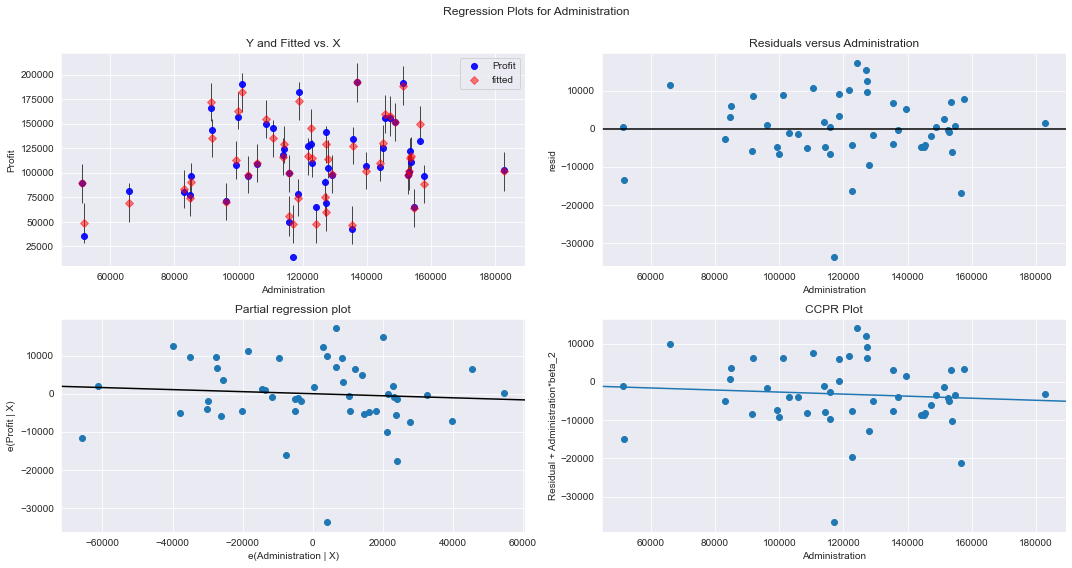

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

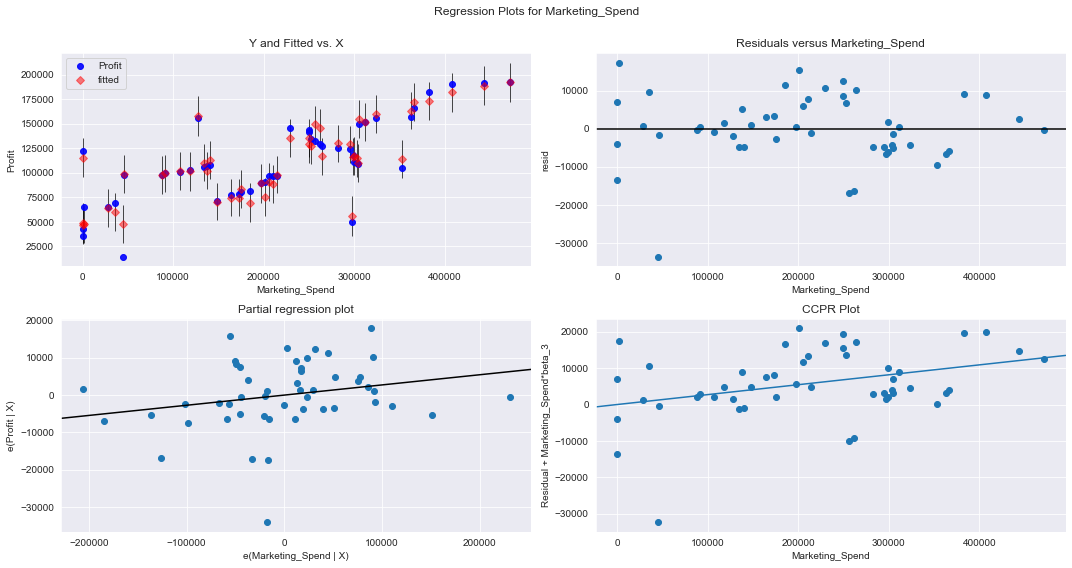

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [ ]:
#Cook’s Distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

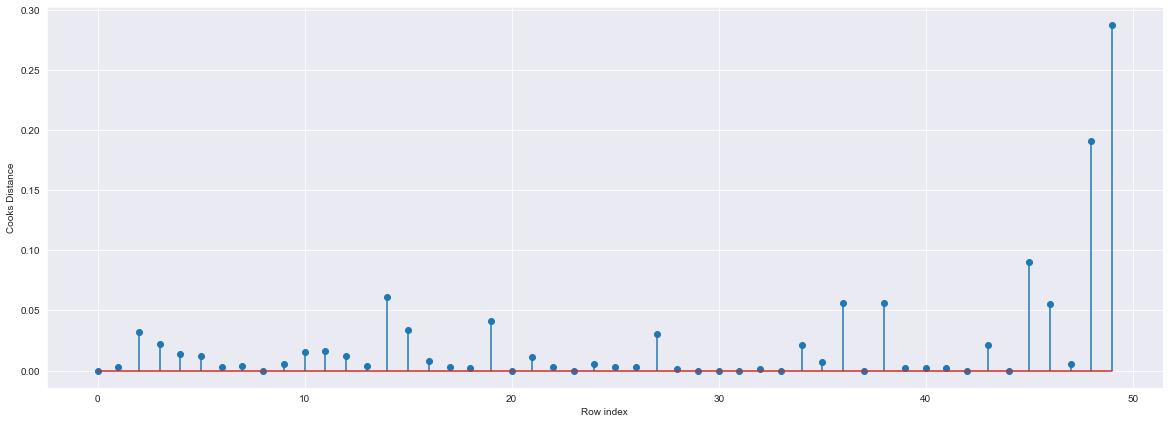

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [ ]:
#High Influence points

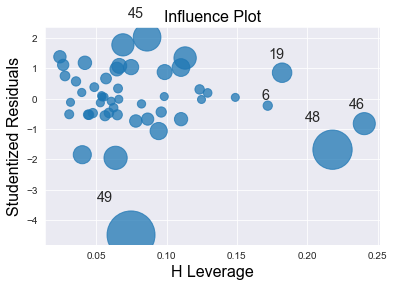

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = df3.shape[1]
n = df3.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [38]:
df3[df3.index.isin([45,46,49,48])]

RDspend  Administration  Marketing_Spend       State    Profit
45  1000.23       124153.04          1903.93    New York  64926.08
46  1315.46       115816.21        297114.46     Florida  49490.75
48   542.05        51743.15             0.00    New York  35673.41
49     0.00       116983.80         45173.06  California  14681.40

In [39]:
df3.head()

RDspend  Administration  Marketing_Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [ ]:
#Improving the model

In [40]:
df4=df3.drop(df3.index[[45,46,48,49]],axis=0).reset_index()

In [41]:
df4=df4.drop(['index'],axis=1)

In [ ]:
#Build Model

In [42]:
final_pra=smf.ols("Profit~RDspend+Administration",data=df4).fit()

In [43]:
(final_pra.rsquared,final_pra.aic)

(0.959323635951178, 951.9187019793172)

In [44]:
final_prd=smf.ols("Profit~RDspend+Marketing_Spend",data=df4).fit()

In [45]:
(final_prd.rsquared,final_prd.aic)

(0.9611920624974509, 949.7556721616616)

In [ ]:
#Cook’s Distance

In [46]:
model_influence_V = final_pra.get_influence()
(c_V, _) = model_influence_V.cooks_distance

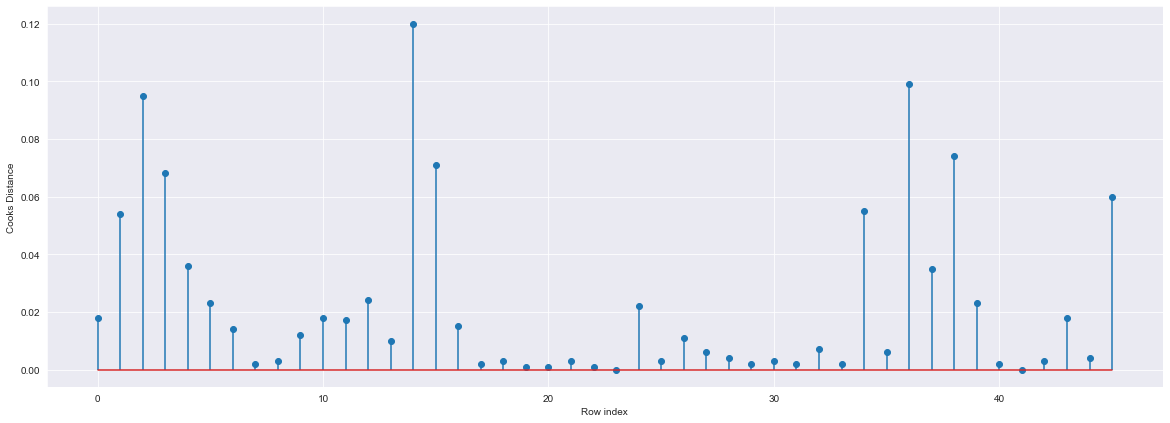

In [47]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [48]:
(np.argmax(c_V),np.max(c_V))

(14, 0.1203531070081363)

In [49]:
df5=df4.drop(df4.index[[1,2,3,14,15,34,36,37,38,45]],axis=0)

In [50]:
df6=df5.reset_index()

In [51]:
df7=df6.drop(['index'],axis=1)

In [ ]:
#Build the model on the new data

In [52]:
final_prs=smf.ols("Profit~RDspend+Marketing_Spend",data=df7).fit()

In [53]:
model_influence_V = final_prs.get_influence()
(c_V, _) = model_influence_V.cooks_distance

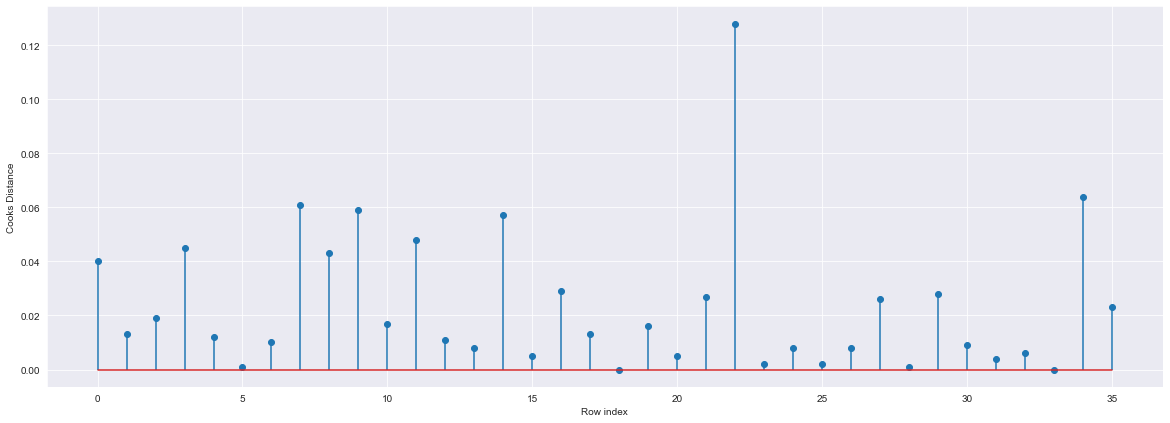

In [54]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [55]:
(np.argmax(c_V),np.max(c_V))

(22, 0.12767901025002423)

In [ ]:
#Check the accuracy of the mode

In [56]:
final_prs=smf.ols("Profit~RDspend+Marketing_Spend",data=df7).fit()

In [57]:
(final_prs.rsquared,final_prs.aic)

(0.9683031042382789, 725.7159629499113)

In [ ]:
#2
#New data for prediction

In [58]:
new_data=pd.DataFrame({'RDspend':16600,"Marketing_Spend":14500,'administration':12300},index=[1])

In [59]:
final_prs.predict(new_data)

1    64300.704786
dtype: float64

In [60]:
final_prs.predict(new_data.iloc[0:5,])

1    64300.704786
dtype: float64

In [61]:
pred_prs = final_prs.predict(new_data)

In [62]:
pred_prs

1    64300.704786
dtype: float64

In [ ]:
#Consider only the below columns and prepare a prediction model for predicting Price.

In [63]:
data=pd.read_csv("ToyotaCorolla (1).csv")

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [64]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [65]:
data.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

In [66]:
data2=data.rename({"Age_08_04":"Age"},axis=1)

In [67]:
data2

Id                                              Model  Price  Age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0            10      2002  46986    Diesel   90          1  ...            1   
1            10      2002  72937    Diesel   90          1  ...            1   
2             9      2002  41711    Diesel   90          1  ...            0   
3             7      2002  48000    Diesel   90          0  ...            0   
4             3      2002  38500    Diesel   90          0  ...            1   
...         ...       ...    ...       ...  ...        ...  ...          ...   
1431         12      1998  20544    Petrol   86          1  ...            1   
1432          9      1998  19000    Petrol   86          0  ...            0   
1433         10      1998  17016    Petrol   86          0  ...            0   
1434         11      1998  16916    Petrol   86          1  ...            0   
1435          5      1998      1    Petrol  110          0  ...            0   

      Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                   1               1      0          0            0   
1                   0               1      0          0            0   
2                   0               1      0          0            0   
3                   0               1      0          0            0   
4                   1               1      0          1            0   
...               ...             ...    ...        ...          ...   
1431                1               1      0          1            1   
1432                0               1      0          0            1   
1433                0               1      0          0            0   
1434                0               0      0          0            0   
1435                0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1431                 1             0               0        0  
1432                 1             0               0        0  
1433                 1             0               0        0  
1434                 1             0               0        0  
1435                 0             0               0        0  

[1436 rows x 38 columns]

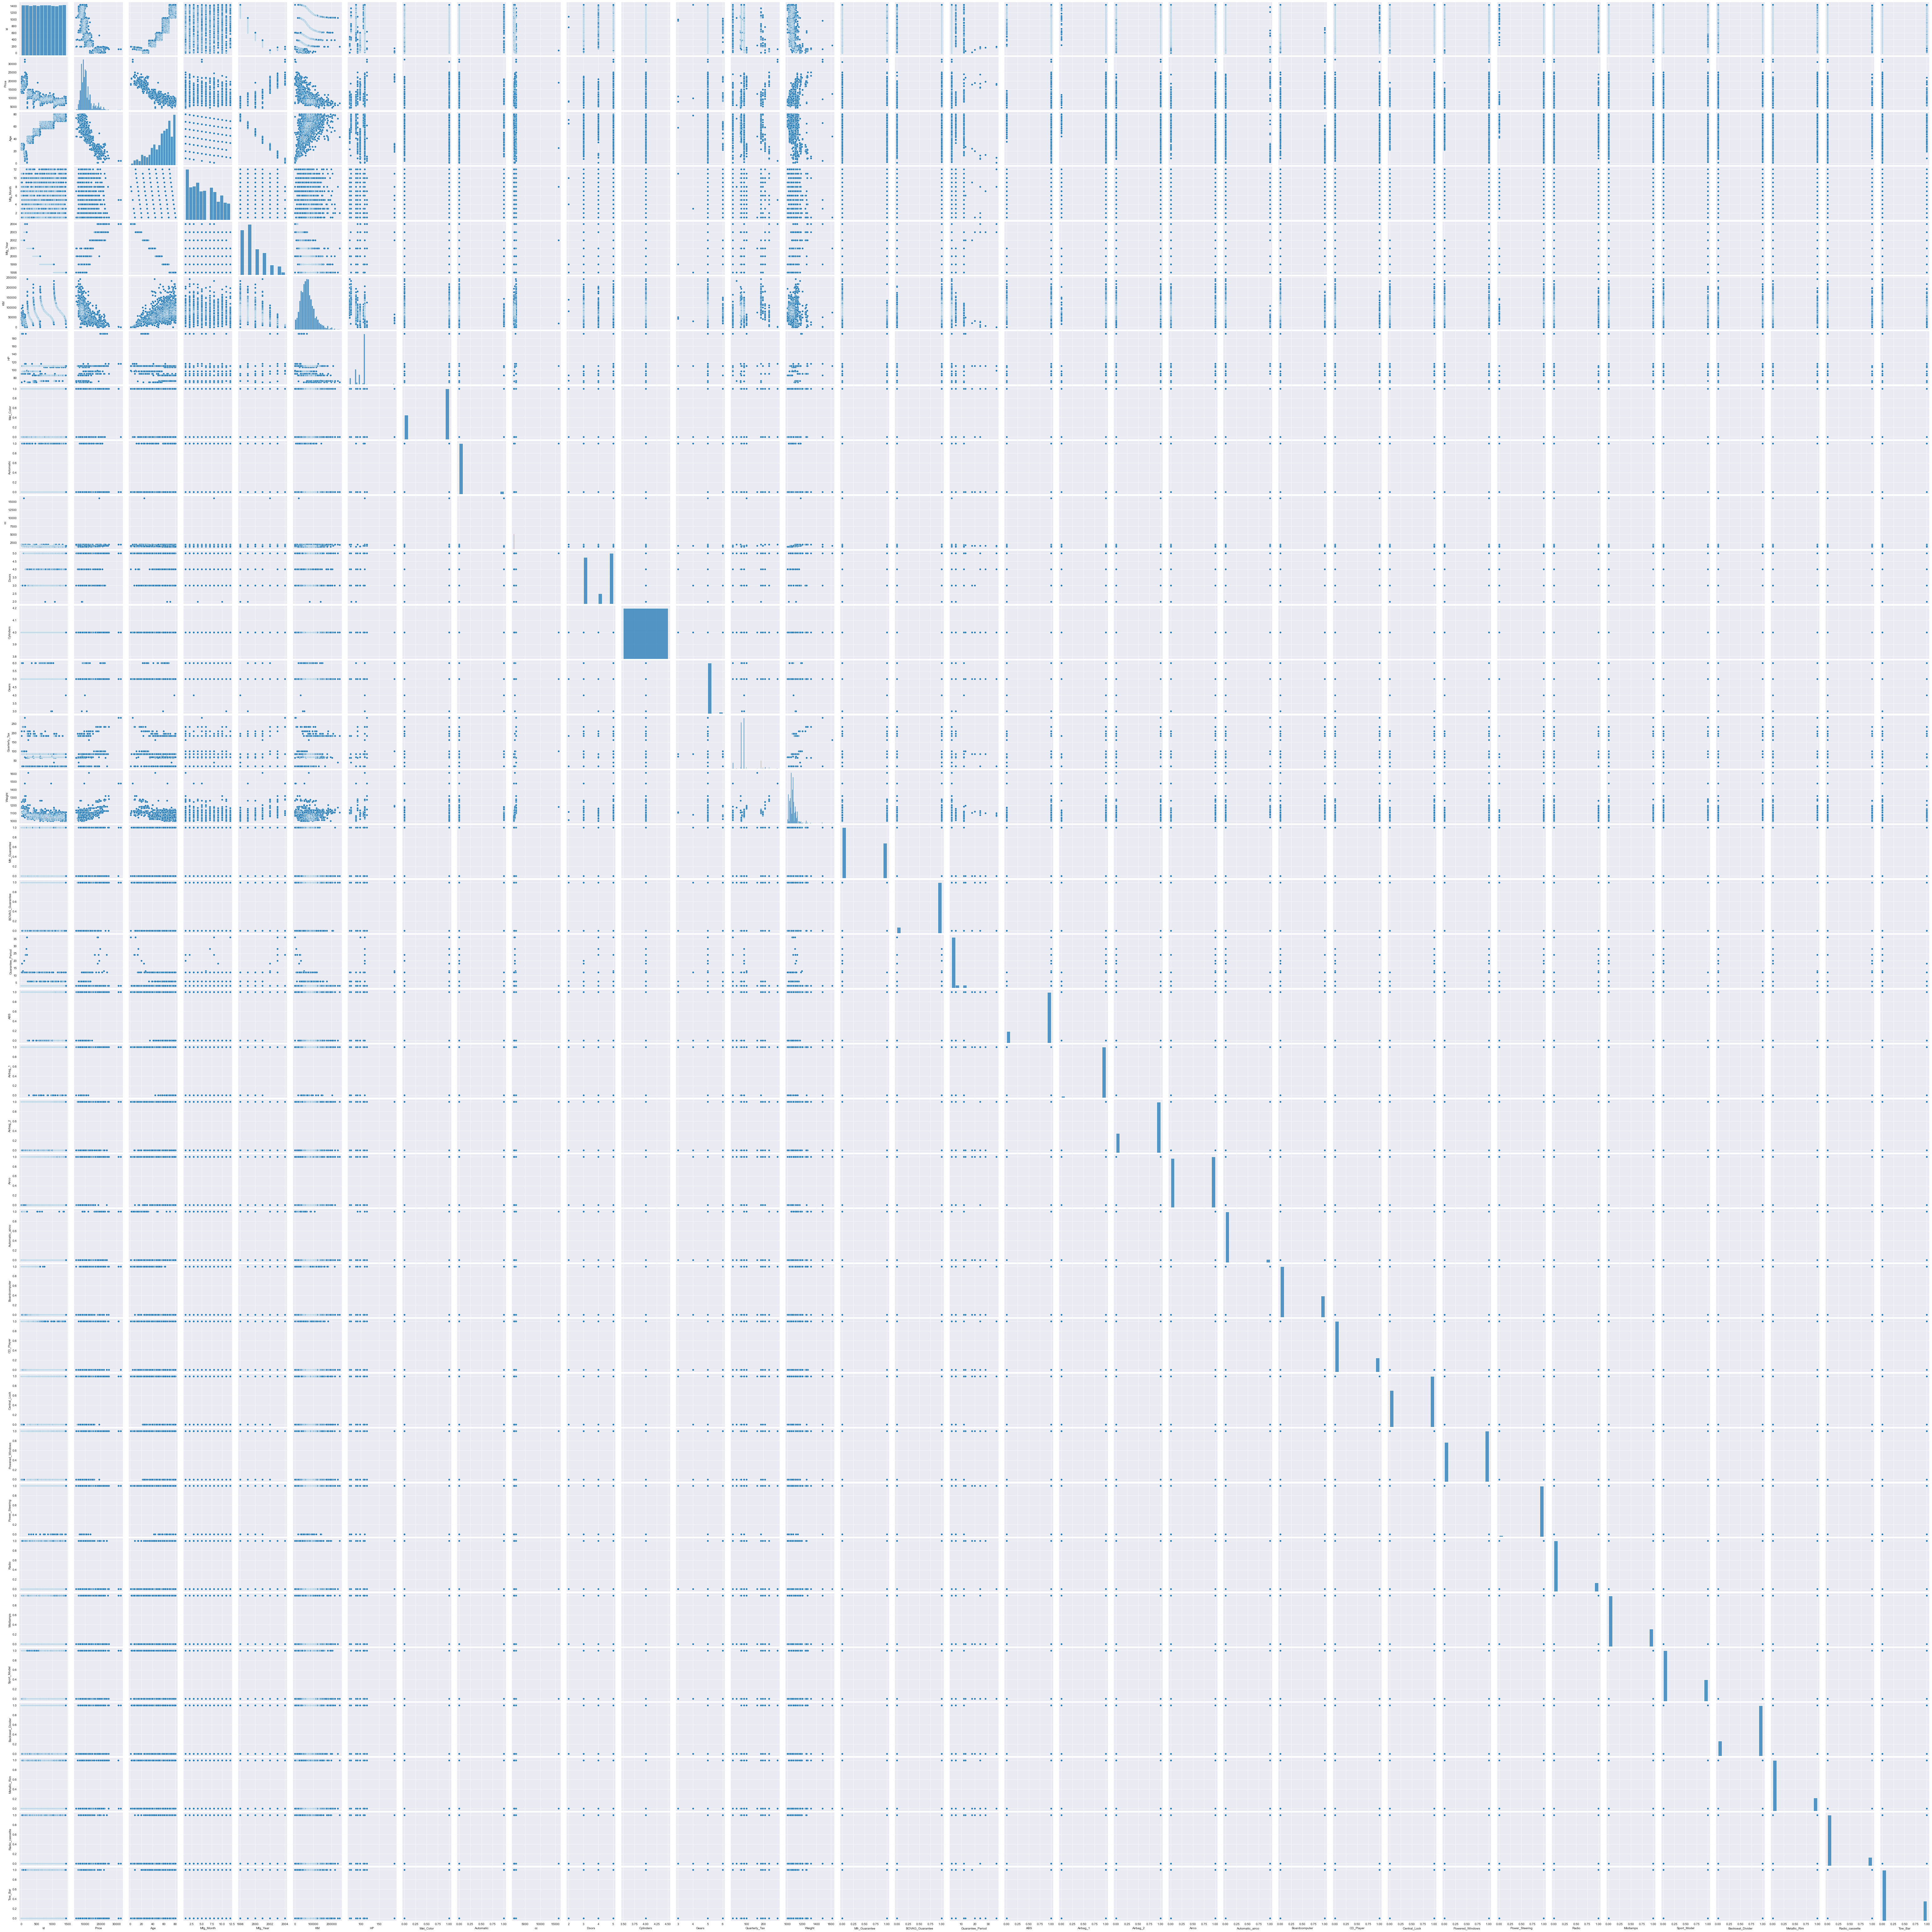

In [68]:
sns.set_style(style="darkgrid")
sns.pairplot(data2)

In [69]:
import statsmodels.formula.api as smf

In [70]:
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit()

In [71]:
model

In [72]:
model.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [73]:
print(model.tvalues,"/n",model.pvalues)

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 /n Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [74]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [75]:
m_pc=smf.ols("Price~cc",data=data2).fit()

In [76]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [77]:
print(m_pc.tvalues,"\n",m_pc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [78]:
m_pd=smf.ols("Price~Doors",data=data2).fit()

In [79]:
print(m_pd.tvalues,"\n",m_pd.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [80]:
m_pcd=smf.ols("Price~Doors+cc",data=data2).fit()

In [81]:
print(m_pcd.tvalues,"\n",m_pcd.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


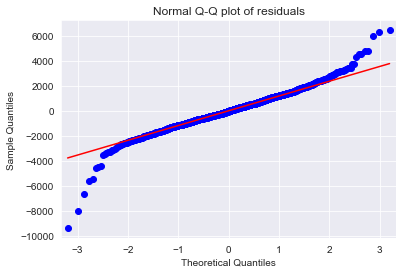

In [82]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [83]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [84]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

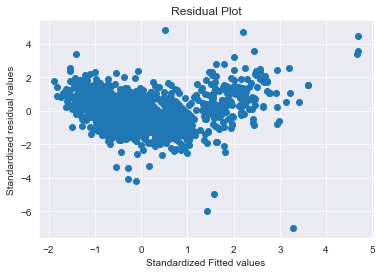

In [85]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

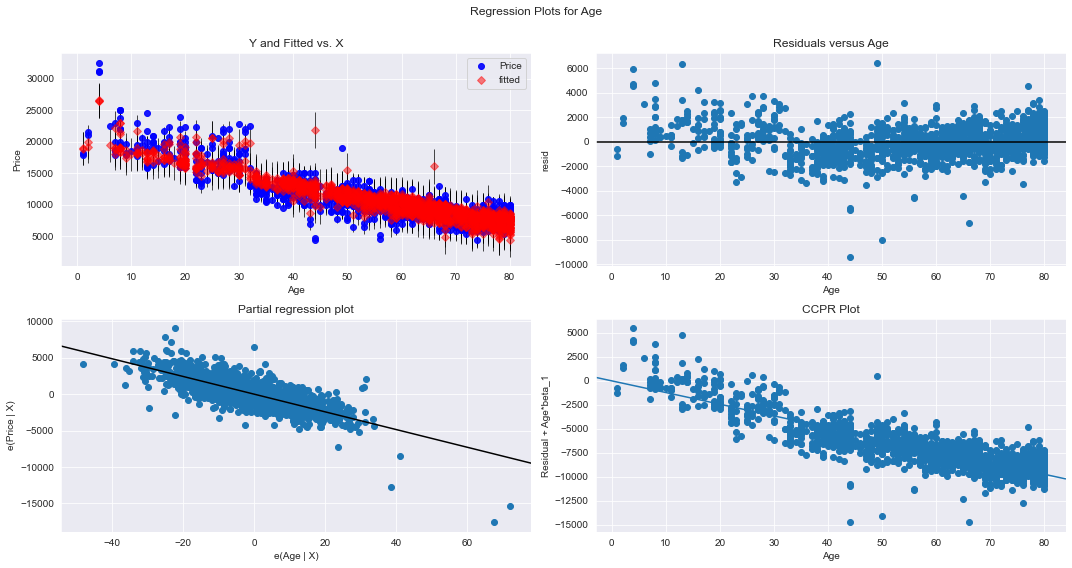

In [86]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

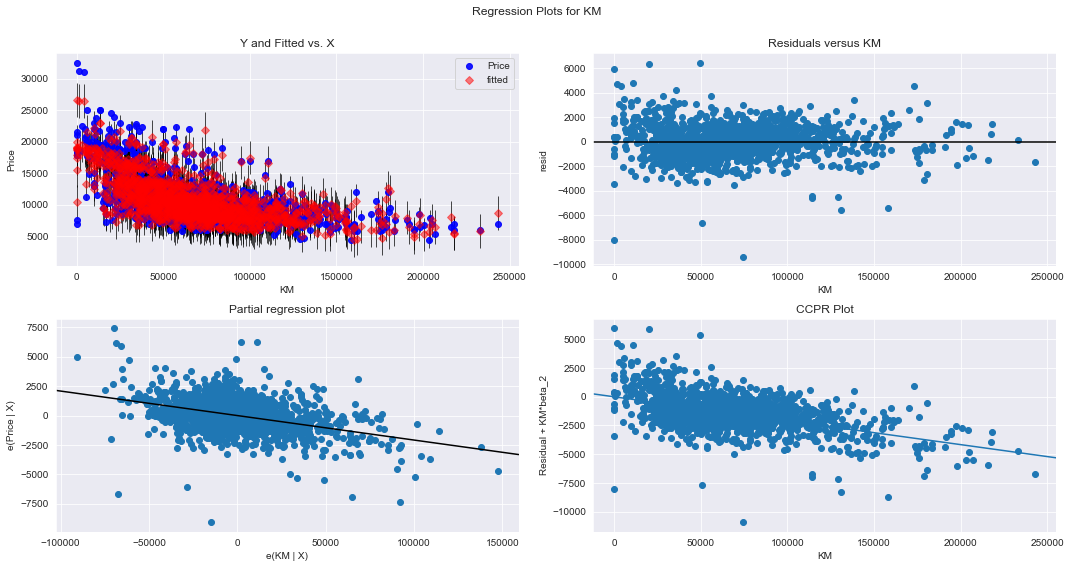

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

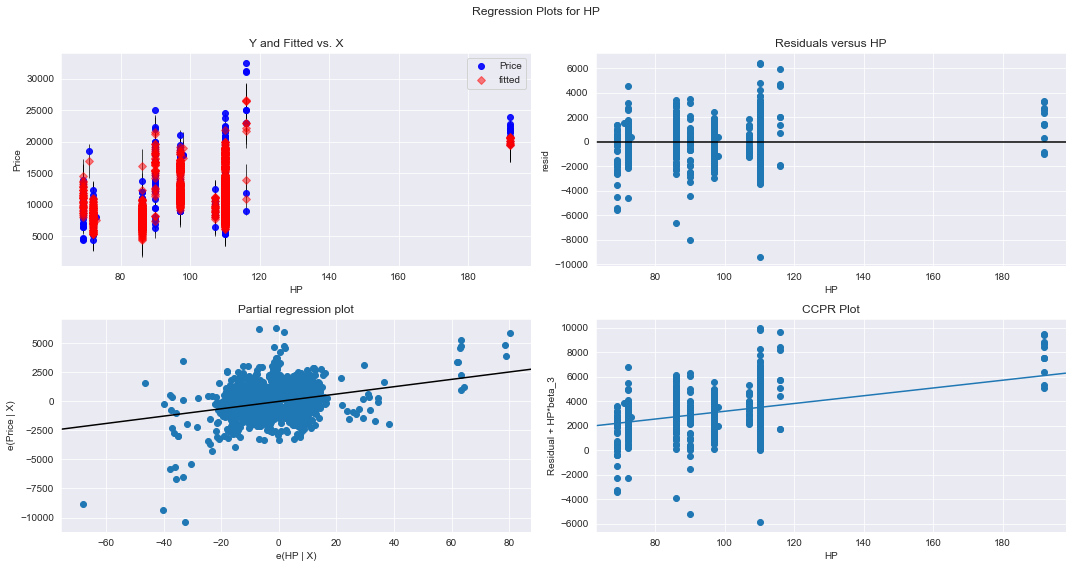

In [88]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

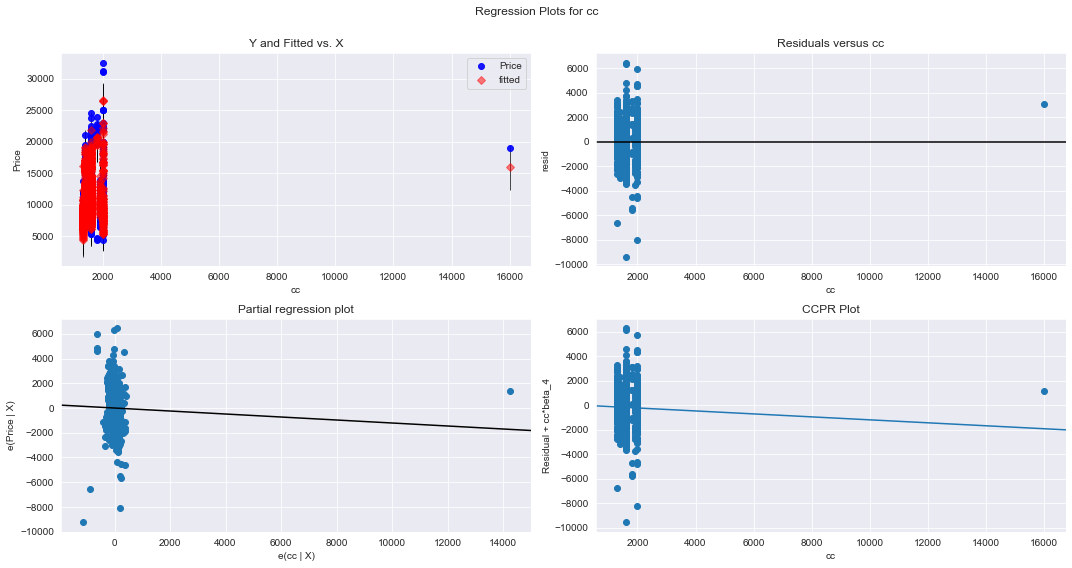

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

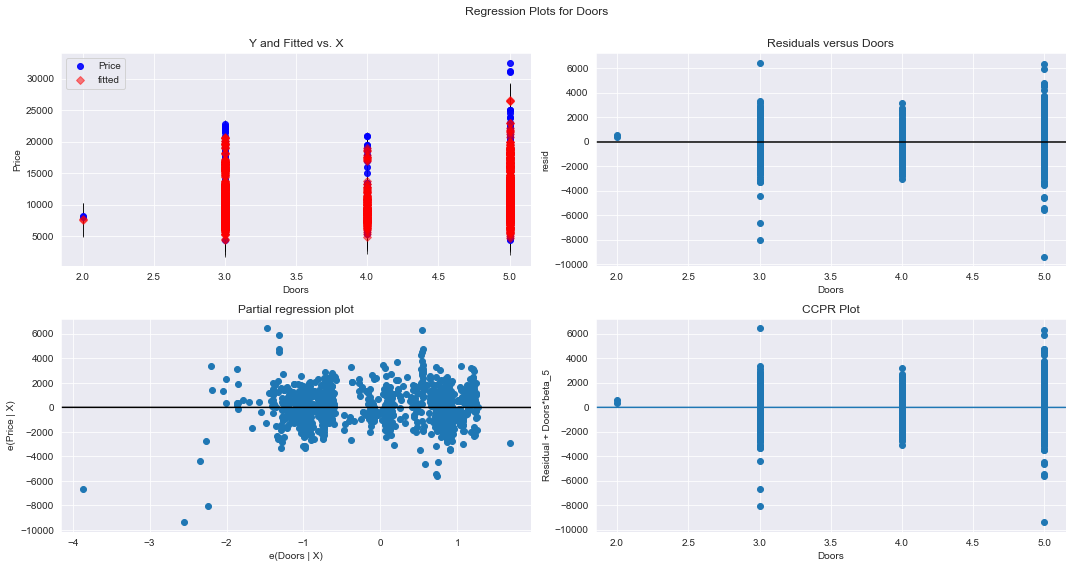

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

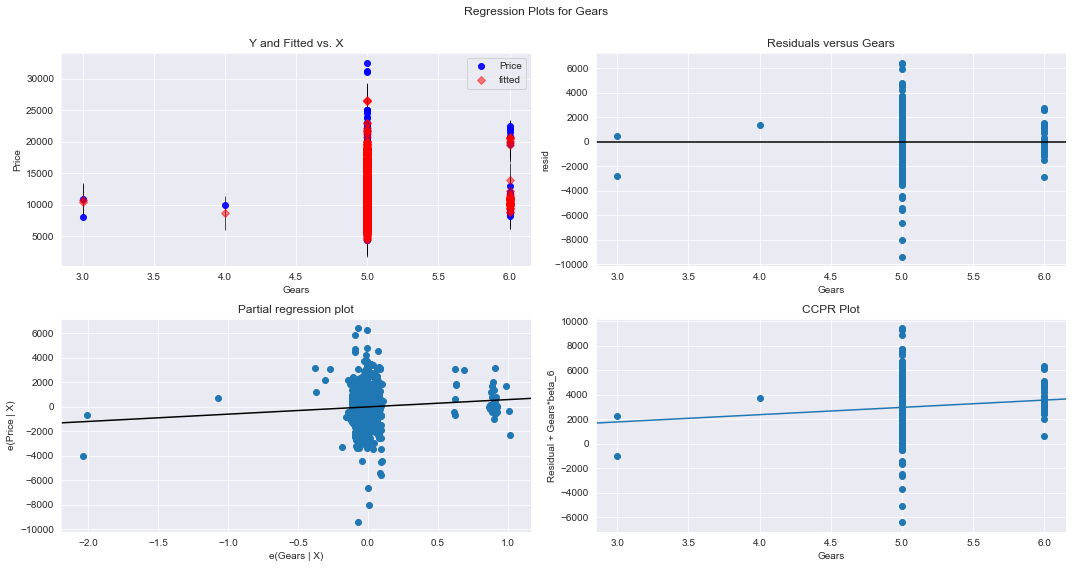

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

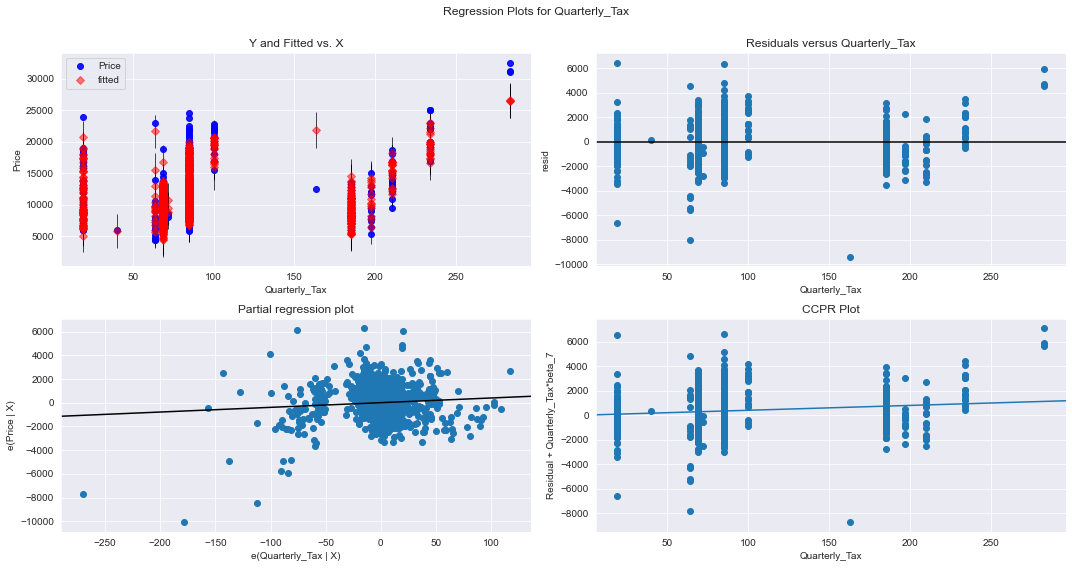

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

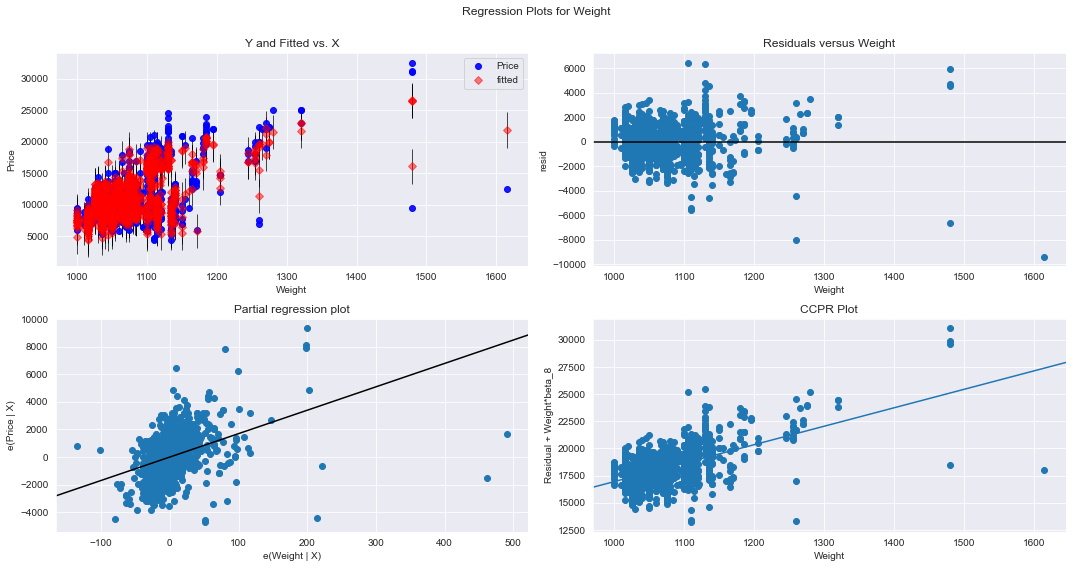

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [94]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

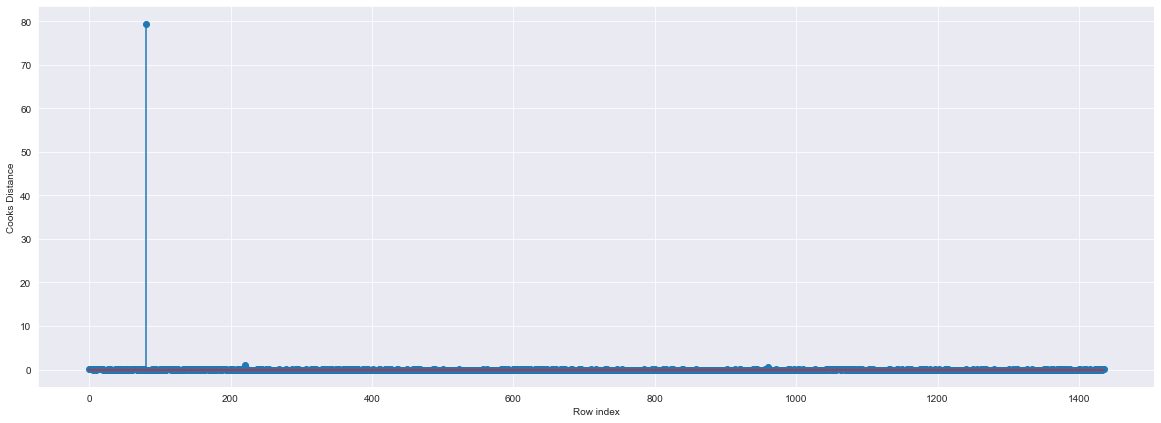

In [95]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [96]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

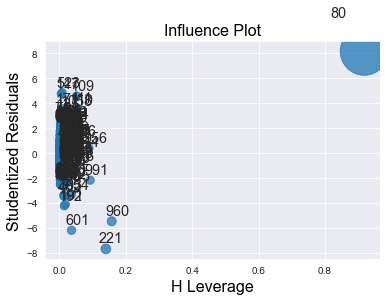

In [97]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [98]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [99]:
data2[data2.index.isin([80])]

Id                                Model  Price  Age  Mfg_Month  Mfg_Year  \
80  81  TOYOTA Corolla 1.6 5drs 1 4/5-Doors  18950   25          8      2002   

       KM Fuel_Type   HP  Met_Color  ... Central_Lock  Powered_Windows  \
80  20019    Petrol  110          1  ...            1                1   

    Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
80               1      0          0            0                 0   

    Metallic_Rim  Radio_cassette  Tow_Bar  
80             0               0        0  

[1 rows x 38 columns]

In [100]:
data2

Id                                              Model  Price  Age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0            10      2002  46986    Diesel   90          1  ...            1   
1            10      2002  72937    Diesel   90          1  ...            1   
2             9      2002  41711    Diesel   90          1  ...            0   
3             7      2002  48000    Diesel   90          0  ...            0   
4             3      2002  38500    Diesel   90          0  ...            1   
...         ...       ...    ...       ...  ...        ...  ...          ...   
1431         12      1998  20544    Petrol   86          1  ...            1   
1432          9      1998  19000    Petrol   86          0  ...            0   
1433         10      1998  17016    Petrol   86          0  ...            0   
1434         11      1998  16916    Petrol   86          1  ...            0   
1435          5      1998      1    Petrol  110          0  ...            0   

      Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                   1               1      0          0            0   
1                   0               1      0          0            0   
2                   0               1      0          0            0   
3                   0               1      0          0            0   
4                   1               1      0          1            0   
...               ...             ...    ...        ...          ...   
1431                1               1      0          1            1   
1432                0               1      0          0            1   
1433                0               1      0          0            0   
1434                0               0      0          0            0   
1435                0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1431                 1             0               0        0  
1432                 1             0               0        0  
1433                 1             0               0        0  
1434                 1             0               0        0  
1435                 0             0               0        0  

[1436 rows x 38 columns]

In [101]:
data3=data2.drop(data2.index[[80]],axis=0).reset_index()

In [102]:
data3=data3.drop(['index'],axis=1)

In [103]:
final_md=smf.ols("Price~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [104]:
(final_md.rsquared,final_md.aic)

(0.8631959819380925, 24751.649416173997)

In [105]:
final_mc=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [106]:
(final_mc.rsquared,final_mc.aic)

(0.8693349475698542, 24685.765438793034)

In [107]:
model_influence = final_md.get_influence()
(c, _) = model_influence.cooks_distance

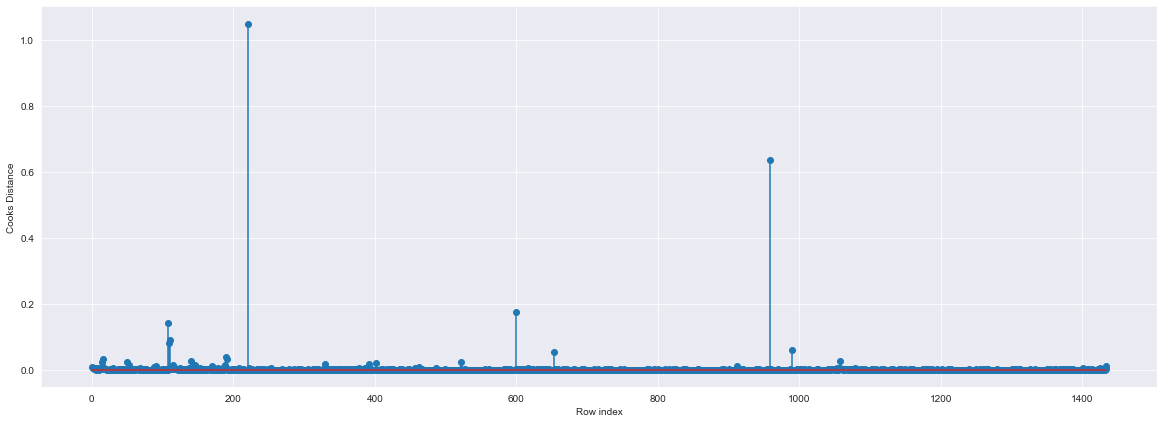

In [108]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

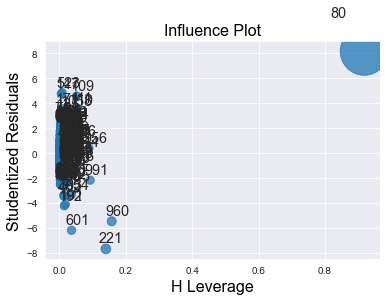

In [109]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [110]:
(np.argmax(c),np.max(c))

(220, 1.0492259521311074)

In [111]:
data3.head()

Id                                           Model  Price  Age  Mfg_Month  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23         10   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23         10   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24          9   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26          7   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30          3   

   Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0      2002  46986    Diesel  90          1  ...            1   
1      2002  72937    Diesel  90          1  ...            1   
2      2002  41711    Diesel  90          1  ...            0   
3      2002  48000    Diesel  90          0  ...            0   
4      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [112]:
data4=data3.drop(data3.index[[959,220]],axis=0).reset_index()

In [113]:
final_mod=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [114]:
(final_mod.rsquared,final_mod.aic)

(0.8693349475698542, 24685.765438793034)

In [115]:
new_data=pd.DataFrame({'Age':25,'KM':45000,'HP':91,'cc':1965,'Doors':4,'Gears':6,'Quarterly_Tax':211,'Weight':1166},index=[1])

In [116]:
final_mod.predict(new_data)

1    16996.29835
dtype: float64

In [117]:
final_mod.predict(new_data.iloc[0:7,])

1    16996.29835
dtype: float64

In [118]:
pred_y = final_mod.predict(new_data)

In [119]:
pred_y

1    16996.29835
dtype: float64